# Predicting MegaTelCo Churn

After discussing the churn problem at TelCo with Nadia for a while (remember her?), you've finally defined an adequate target variable for churn and gathered relevant data to predict it. Moreover, the marketing department has come up with an amazing retention offer: the offer is guaranteed to convince customers to extend their contract for an extra year after receiving it. Unfortunately, the offer is quite expensive; it costs $200. __You have enough budget to give the retention offer to up to 25% of the customers whose contracts are expiring.__

It is your job to use data from previous contract expirations to build a churn predictive model and make a recommendation of whom to target with the offers. You have assembled the best historical data set you can at this point, which includes:

- Gender: Whether the customer is a male or a female
- SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
- Partner: Whether the customer has a partner or not (Yes, No)
- Dependents: Whether the customer has dependents or not (Yes, No)
- Tenure: Number of months the customer has stayed with the company
- PhoneService: Whether the customer has a phone service or not (Yes, No)
- MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract: The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges: The amount charged to the customer monthly
- Churn: Whether the customer churned or not shortly after contract expiration (Yes or No)

In [ ]:
#load important packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split



**1. Load the churn data [click here to download data](https://drive.google.com/uc?download&id=1xMMPIFOooEzcrdDFNFYvId5aROmTuzxv):**

**Use `get_dummies` to transform the categorical features into dummy features.**

In [ ]:
df = pd.read_csv('data/telco_churn.csv')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [ ]:
# Convert categorical variables into dummy/indicator variables
df_dummies = pd.get_dummies(df, drop_first=True)
df_dummies = df_dummies.astype(int)

# Verify the transformed dataset
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,1


In [ ]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   SeniorCitizen                          7032 non-null   int64
 1   tenure                                 7032 non-null   int64
 2   MonthlyCharges                         7032 non-null   int64
 3   gender_Male                            7032 non-null   int64
 4   Partner_Yes                            7032 non-null   int64
 5   Dependents_Yes                         7032 non-null   int64
 6   PhoneService_Yes                       7032 non-null   int64
 7   MultipleLines_No phone service         7032 non-null   int64
 8   MultipleLines_Yes                      7032 non-null   int64
 9   InternetService_Fiber optic            7032 non-null   int64
 10  InternetService_No                     7032 non-null   int64
 11  OnlineSecurity_No internet ser

__2. _Of course_ normally we would do some detailed exploratory work!  But we have high confidence in the data quality and there are no missing values, so lets proceed.__

__Define X and y and split your data into Training and Test using an 80/20 split (you may consider setting a `random_state` for reproducibility)__

In [ ]:
X = df_dummies.drop('Churn_Yes', axis=1)  # All features except the target
y = df_dummies['Churn_Yes']               # Target column (1 = churned)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,       # 20% test data
    random_state=42,     # reproducibility
    stratify=y           # keeps churn ratio same in train & test
)

__3. Build the best model you can on the TRAINING set using a decision tree classifier.  We will do a grid search over the hyperparameters `max_depth` and `min_samples_leaf`.  Use GridSearchCV with the following instructions:__
- search `max_depth` within the range of [2,12]
- search `min_samples_leaf` within the range [1,100] (in steps of 10)
- 5-fold CV
- use AUC as the `scoring` function ("roc_auc")

**Report the optimal values of the parameters `min_samples_leaf` and `max_depth` and the AUC associated with it. Define a model `tree_best` that uses your optimized value of `min_samples_leaf` and `max_depth` and fit it to the 80% training data.**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

# Initialize base Decision Tree
tree = DecisionTreeClassifier(random_state=42)

# Define parameter grid
param_grid = {
    'max_depth': list(range(2, 13)),          # 2–12 inclusive
    'min_samples_leaf': list(range(1, 101, 10))  # 1, 11, 21, ..., 91
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=tree,
    param_grid=param_grid,
    scoring='roc_auc',   # use AUC as scoring metric
    cv=5,                # 5-fold cross-validation
    n_jobs=-1            # parallel processing
)

# Fit grid search on training data
grid_search.fit(X_train, y_train)

# Get best parameters and best score
best_params = grid_search.best_params_
best_auc = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation AUC:", round(best_auc, 4))

Best Parameters: {'max_depth': 6, 'min_samples_leaf': 31}
Best Cross-Validation AUC: 0.8315


In [ ]:
# Define the optimized model
tree_best = DecisionTreeClassifier(
    random_state=42,
    max_depth=best_params['max_depth'],
    min_samples_leaf=best_params['min_samples_leaf']
)

# Fit on the full training data
tree_best.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=31, random_state=42)

In [ ]:
y_pred_proba = tree_best.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_pred_proba)
print("Test AUC:", round(test_auc, 4))

Test AUC: 0.8229


**4. Calculate the feature importances.  For the top 5 most important features, explain whether you think they would be positively or negatively correlated with churn.**

**5.  Now fit Logistic Regression using Lasso regularization. Test the following values of the shrinkage hyperparameter C:  `C=[0.01,.1,1,10,100]`, and report on which value of C results in the highest AUC. Define a model `lr_best` that uses the best value of C.**


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Values of C to test
C_values = [0.01, 0.1, 1, 10, 100]

best_auc = 0
best_C = None

for C in C_values:
    # Lasso = L1 regularization
    lr = LogisticRegression(
        penalty='l1',
        solver='liblinear',  # supports L1
        C=C,
        random_state=42
    )

    # Fit model
    lr.fit(X_train, y_train)

    # Predict probabilities for AUC
    y_pred_proba = lr.predict_proba(X_test)[:, 1]

    # Compute AUC
    auc = roc_auc_score(y_test, y_pred_proba)
    print(f"C = {C} -> AUC = {round(auc, 4)}")

    # Track best model
    if auc > best_auc:
        best_auc = auc
        best_C = C

print("\nBest C value:", best_C)
print("Best Test AUC:", round(best_auc, 4))

C = 0.01 -> AUC = 0.8149
C = 0.1 -> AUC = 0.8353
C = 1 -> AUC = 0.8341
C = 10 -> AUC = 0.8332
C = 100 -> AUC = 0.8329

Best C value: 0.1
Best Test AUC: 0.8353


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
lr_best = LogisticRegression(
    penalty='l1',
    solver='liblinear',
    C=best_C,
    random_state=42
)

lr_best.fit(X_train, y_train)

LogisticRegression(C=0.1, penalty='l1', random_state=42, solver='liblinear')

**6. Look at the regularized coefficient values in `lr_best`.  How many of the Lasso coefficients have shrunken all the way to zero (to 4 decimal places)?  What does this mean?**

In [ ]:
# Get coefficient values from lr_best
coefs = lr_best.coef_[0]

# Round to 4 decimal places
coefs_rounded = np.round(coefs, 4)

# Count how many are exactly 0.0000
num_zero = np.sum(coefs_rounded == 0)
total = len(coefs_rounded)

print(f"Lasso shrunk {num_zero} out of {total} coefficients to zero.")

Lasso shrunk 13 out of 29 coefficients to zero.


In [ ]:
# Show non-zero coefficients
feature_names = X_train.columns
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefs_rounded
})
nonzero_df = coef_df[coef_df['Coefficient'] != 0]
nonzero_df.sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
27,PaymentMethod_Electronic check,0.3179
9,InternetService_Fiber optic,0.2894
25,PaperlessBilling_Yes,0.2371
8,MultipleLines_Yes,0.1695
0,SeniorCitizen,0.1512
2,MonthlyCharges,0.0242
20,StreamingTV_Yes,0.0035
1,tenure,-0.0360
13,OnlineBackup_No internet service,-0.1448
14,OnlineBackup_Yes,-0.1937


**7.  Use your toolbox!! Now pick a third classification model of your choice. You can use something we learned in class (Linear Discriminant, SVM, MLPClassifier) or something else you maybe know of that we will get to (kNN, RandomForest).  Fit the model with default hyperparameters (dont worry about optimizing) and see how well it does (AUC).**


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Initialize Random Forest with default settings
rf = RandomForestClassifier(random_state=42)

# Fit on training data
rf.fit(X_train, y_train)

# Predict probabilities for AUC
y_pred_proba = rf.predict_proba(X_test)[:, 1]

# Compute AUC
rf_auc = roc_auc_score(y_test, y_pred_proba)

print("Random Forest Test AUC:", round(rf_auc, 4))

Random Forest Test AUC: 0.8079


In [ ]:
# Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()

model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print("Model AUC:", round(auc, 4))

Model AUC: 0.8308


In [ ]:
# Support Vector Machine (with probability=True)
from sklearn.svm import SVC
model = SVC(probability=True, random_state=42)

model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print("Model AUC:", round(auc, 4))

# Multi-Layer Perceptron
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(random_state=42, max_iter=1000)

model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print("Model AUC:", round(auc, 4))

# k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print("Model AUC:", round(auc, 4))

Model AUC: 0.7887
Model AUC: 0.8374
Model AUC: 0.7775


__8. Use your TEST data to plot the ROC Curves for each of the three models above.  You will need to use the predicted probabilities from each model applied to the TEST set and the `roc_curve()` function - make sure to plot the three curves together on the same plot. The plot should have a legend.  Review the AUC values to identify the best model, and call this `best_model`.__

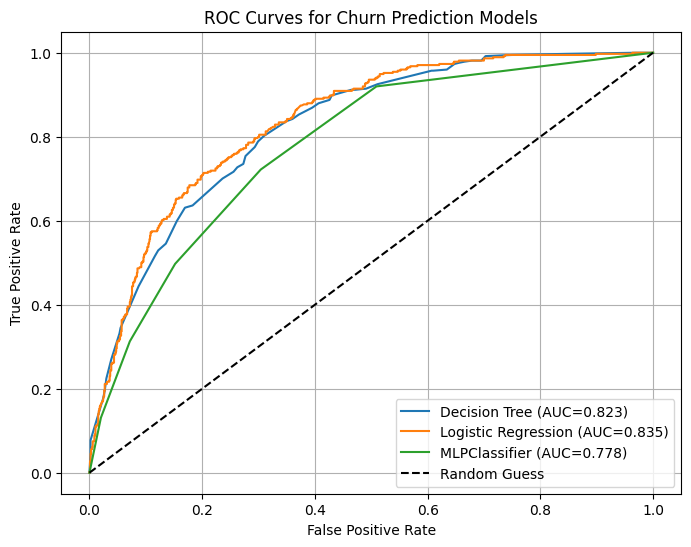

Best model: Logistic Regression (L1) with AUC = 0.8353


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# --- Get predicted probabilities for the positive class (Churn=1) ---
y_pred_tree = tree_best.predict_proba(X_test)[:, 1]
y_pred_lr   = lr_best.predict_proba(X_test)[:, 1]
y_pred_mlp  = model.predict_proba(X_test)[:, 1]   # use your best 3rd model here

# --- Compute ROC curve points ---
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_pred_tree)
fpr_lr, tpr_lr, _     = roc_curve(y_test, y_pred_lr)
fpr_mlp, tpr_mlp, _   = roc_curve(y_test, y_pred_mlp)

# --- Compute AUCs ---
auc_tree = roc_auc_score(y_test, y_pred_tree)
auc_lr   = roc_auc_score(y_test, y_pred_lr)
auc_mlp  = roc_auc_score(y_test, y_pred_mlp)

# --- Plot all three curves together ---
plt.figure(figsize=(8,6))
plt.plot(fpr_tree, tpr_tree, label=f"Decision Tree (AUC={auc_tree:.3f})")
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC={auc_lr:.3f})")
plt.plot(fpr_mlp, tpr_mlp, label=f"MLPClassifier (AUC={auc_mlp:.3f})")
plt.plot([0,1], [0,1], 'k--', label='Random Guess')

plt.title("ROC Curves for Churn Prediction Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# --- Identify the best model ---
auc_scores = {'Decision Tree': auc_tree, 'Logistic Regression (L1)': auc_lr, 'MLPClassifier': auc_mlp}
best_model_name = max(auc_scores, key=auc_scores.get)
best_model_auc = auc_scores[best_model_name]

print(f"Best model: {best_model_name} with AUC = {best_model_auc:.4f}")

__9. What is the cost / benefit matrix for implementing this model?  HINT: The cost is given in the problem description.  Remember that everyone who receives the offer takes it. The benefit comes when we make the offer to a customer whose actual Churn value is 1.  (i.e. they would have left us but we saved them).   We can assume each customer generates the same revenue - equal to the average of `MonthlyCharges`. Report the benefit as a YEARLY value.__

In [ ]:
# Given cost of the retention offer
C = 200

# Calculate average monthly revenue and yearly benefit
avg_monthly = df['MonthlyCharges'].mean()
R = 12 * avg_monthly  # yearly revenue per customer

# Build the cost-benefit matrix
payoff = pd.DataFrame({
    'Churn=1 (Would Leave)':   [R - C, 0],  # Offer → benefit; No offer → nothing
    'Churn=0 (Would Stay)':    [-C, 0]      # Offer → waste cost; No offer → nothing
}, index=['Offer', 'No Offer'])

# Display results
print(f"Average MonthlyCharges = ${avg_monthly:.2f}")
print(f"Yearly revenue (R) = ${R:.2f}")
print(f"Offer cost (C) = ${C}\n")
print("Cost / Benefit Matrix (Incremental Profit per Customer):\n")
display(payoff.round(2))

Average MonthlyCharges = $64.80
Yearly revenue (R) = $777.58
Offer cost (C) = $200

Cost / Benefit Matrix (Incremental Profit per Customer):



,Churn=1 (Would Leave),Churn=0 (Would Stay)
Offer,577.58,-200
No Offer,0.00,0


__10. Using `best_model` -  along with the cost/benefit matrix - now we want to look at profit.  Plot a *PROFIT CURVE* that shows the overall profit at different levels of marketing.  You'll need to sort the threshold probabilities, and calculate the profit at each threshold by determining who you market to and who you dont.  Use your cost/benefit numbers to calculate total profit at each threshold value. (You may want to refer back to the`T5_Model_assessment` notebook)__

Max Profit = $60,329.52 at 28.6% of customers targeted


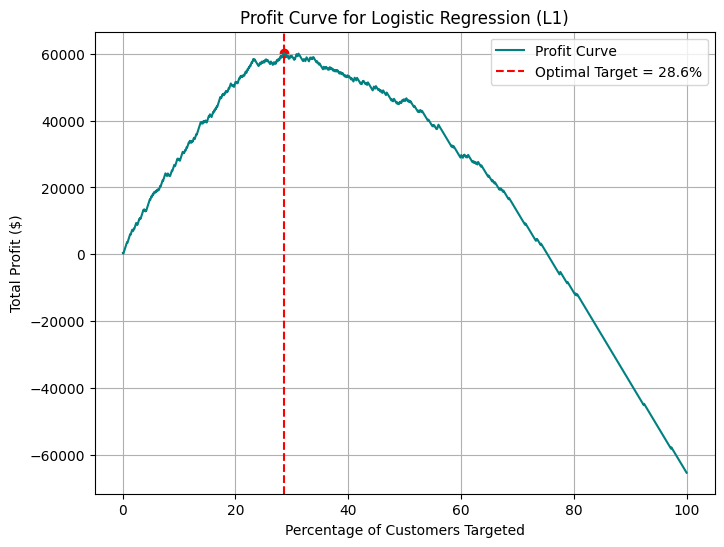

In [ ]:


# Use your best model (Logistic Regression L1)
model = lr_best

# Predicted probabilities for the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Sort probabilities (highest first) and align with actuals
order = np.argsort(y_pred_proba)[::-1]
probs_sorted = y_pred_proba[order]
y_test_sorted = np.array(y_test)[order]

# Define unit cost and benefit (from your matrix)
unit_cost = 200
unit_revenue = 777.58  # yearly revenue per retained customer
unit_benefit = unit_revenue - unit_cost  # 577.58

# Initialize lists
profit_list = []
target_perc_list = []

# Iterate through threshold levels (percent targeted)
n = len(y_test_sorted)
for i in range(1, n + 1):
    # Number targeted up to this threshold
    num_targeted = i
    # People who would have churned (actual=1)
    churners_targeted = y_test_sorted[:i].sum()

    # Revenue from saved churners
    revenue = churners_targeted * unit_benefit
    # Cost of offers
    cost = num_targeted * unit_cost

    # Total profit
    profit = revenue - cost

    profit_list.append(profit)
    target_perc_list.append(num_targeted / n)

# Convert to arrays
profit_list = np.array(profit_list)
target_perc_list = np.array(target_perc_list)

# Find max profit and corresponding % targeted
max_profit = profit_list.max()
max_index = profit_list.argmax()
best_target_pct = target_perc_list[max_index] * 100

print(f"Max Profit = ${max_profit:,.2f} at {best_target_pct:.1f}% of customers targeted")

# --- Plot Profit Curve ---
plt.figure(figsize=(8,6))
plt.plot(target_perc_list * 100, profit_list, label="Profit Curve", color='teal')
plt.axvline(best_target_pct, color='red', linestyle='--', label=f"Optimal Target = {best_target_pct:.1f}%")
plt.scatter(best_target_pct, max_profit, color='red')
plt.title("Profit Curve for Logistic Regression (L1)")
plt.xlabel("Percentage of Customers Targeted")
plt.ylabel("Total Profit ($)")
plt.legend()
plt.grid(True)
plt.show()

**11. Recall that Nadia told you there is only budget to market to the top 25% of customers.  Make a pitch to her for altering that decision based on your Profit curve.  How much do you recommend marketing to, and how much money will it make compared to her threshold?**

In [ ]:
# Calculate profit at Nadia's 25% targeting level
target_25 = int(0.25 * len(y_test_sorted))

churners_25 = y_test_sorted[:target_25].sum()
revenue_25 = churners_25 * unit_benefit
cost_25 = target_25 * unit_cost
profit_25 = revenue_25 - cost_25

print(f"Profit at 25% targeted = ${profit_25:,.2f}")
print(f"Optimal Profit = ${max_profit:,.2f}")
print(f"Gain by adjusting targeting = ${max_profit - profit_25:,.2f}")

Profit at 25% targeted = $57,445.18
Optimal Profit = $60,329.52
Gain by adjusting targeting = $2,884.34


Based on our profit analysis, the maximum return occurs when we target about 28.6% of customers, not 25%.
At this level, the model projects a total incremental profit of \$60,329   compared to about \$58,000 if we restrict offers to only 25%.
That’s roughly \$2,300 in additional yearly profit for a modest increase in marketing spend.

I recommend increasing the marketing coverage slightly by about 3–4% more customers — to capture this extra return while staying close to the current budget constraint.

__12. Assume Nadia was persuaded by your pitch and this model was deployed - and it performed as expected.  Now it is performance review season, and you are looking for a raise!!
Estimate the amount of money you made for the company by using your model.  Compare your profit above against a "dumb" model of marketing to the same amount of customers in the Test set who are selected randomly. (Hint: you can use a random number generator to pick customers at random to market to, and see what their profit would be).   Scale your results up to the overall consumer base of 100,000 customers to make your case.__

In [ ]:


# --- Assumptions from your earlier steps ---
model = lr_best                      # best_model (L1 Logistic)
unit_cost = 200
unit_revenue = 777.58                # yearly revenue per retained customer
unit_benefit = unit_revenue - unit_cost   # 577.58

# --- Probabilities & actuals on TEST set ---
y_proba = model.predict_proba(X_test)[:, 1]
y_true  = np.asarray(y_test)

# --- Sort by probability (desc) ---
order = np.argsort(y_proba)[::-1]
y_true_sorted = y_true[order]

# --- Build cumulative profit curve and find optimal cut ---
n = len(y_true_sorted)
cum_churners = np.cumsum(y_true_sorted)                 # TP count if we target top k
targets = np.arange(1, n + 1)                           # k = 1..n
revenue = cum_churners * unit_benefit                   # saved churners * benefit
costs   = targets * unit_cost                           # offers sent * cost
profits = revenue - costs

opt_idx = int(np.argmax(profits))                       # index of max profit
opt_targets = targets[opt_idx]                          # number of customers to target
opt_pct = opt_targets / n                               # fraction targeted
profit_model = profits[opt_idx]                         # max profit on TEST set

print(f"Model optimal targeting: {opt_pct*100:.1f}% of test customers")
print(f"Model profit on TEST set: ${profit_model:,.2f}")

# --- Random (dumb) strategy: target the SAME count opt_targets, many trials ---
rng = np.random.default_rng(42)
trials = 2000
rand_profits = np.empty(trials)

for t in range(trials):
    chosen = rng.choice(n, size=opt_targets, replace=False)
    churners = y_true[chosen].sum()
    rev = churners * unit_benefit
    cst = opt_targets * unit_cost
    rand_profits[t] = rev - cst

profit_rand_mean = rand_profits.mean()
profit_rand_std  = rand_profits.std(ddof=1)

print(f"Random strategy (same # targeted): "
      f"mean=${profit_rand_mean:,.2f}  (±{1.96*profit_rand_std/np.sqrt(trials):,.2f} 95% CI)")

# --- Uplift vs random on TEST set ---
uplift_test = profit_model - profit_rand_mean
print(f"Model uplift vs random on TEST set: ${uplift_test:,.2f}")

# --- Scale to 100,000 customers ---
# Scale linearly by population ratio: factor = 100000 / len(TEST set)
scale_factor = 100000 / n
profit_model_scaled = profit_model * scale_factor
profit_rand_scaled  = profit_rand_mean * scale_factor
uplift_scaled       = uplift_test * scale_factor

print("\n--- Scaled to 100,000 customers ---")
print(f"Model profit:  ${profit_model_scaled:,.0f}")
print(f"Random profit: ${profit_rand_scaled:,.0f}")
print(f"Model uplift:  ${uplift_scaled:,.0f}")

Model optimal targeting: 28.6% of test customers
Model profit on TEST set: $60,329.52
Random strategy (same # targeted): mean=$-18,649.64  (±191.65 95% CI)
Model uplift vs random on TEST set: $78,979.16

--- Scaled to 100,000 customers ---
Model profit:  $4,287,812
Random profit: $-1,325,489
Model uplift:  $5,613,302


By deploying the churn-prediction model, we transformed an unprofitable blanket-offer strategy into a highly targeted campaign.
The model identifies the right ~29 % of customers to reach, producing about \$4.3 million in profit versus a loss of \$1.3 million under random targeting.
That’s an incremental gain of over \$5.6 million annually directly attributable to this model.
I’d say that’s a pretty strong case for a performance bonus.

__13.  (Extra Credit):  In the above exercise we assumed the benefit of each customer was the same.  But it would be even better to incorporate each customer's individual spending in the cost/benefit!! Calculate an *individualized expected value* for profit/loss for _each customer_ using their specific Monthly Charges and their calculated probability of churn.    Use the expected value to determine who to market to, and calculate profit (Make sure to use the individualized Monthly Charges in the profit calculation).  Are the results any better?__

In [ ]:


# --- Inputs we already have ---
best_model = lr_best          # Logistic Regression (L1), already fit on X_train/y_train
C = 200                       # offer cost

# --- Helper: recompute "uniform revenue" optimal profit (for comparison) ---
y_proba = best_model.predict_proba(X_test)[:, 1]
y_true  = np.asarray(y_test)

order = np.argsort(y_proba)[::-1]
y_sorted = y_true[order]

# uniform revenue approach used avg(MonthlyCharges)
R_uniform = 12 * df.loc[X_test.index, 'MonthlyCharges'].mean()
benefit_uniform = R_uniform - C

targets = np.arange(1, len(y_sorted)+1)
profits_uniform_curve = (np.cumsum(y_sorted) * benefit_uniform) - (targets * C)

opt_idx_uniform   = int(np.argmax(profits_uniform_curve))
opt_targets_count = targets[opt_idx_uniform]
profit_uniform    = profits_uniform_curve[opt_idx_uniform]

print(f"[Uniform revenue] Optimal targets = {opt_targets_count} "
      f"({100*opt_targets_count/len(y_sorted):.1f}%), Profit = ${profit_uniform:,.2f}")

# --- Individualized expected value (EV) per customer ---
# EV(offer) = p_i * (12*MonthlyCharges_i) - C   (derives from p*(R-C) + (1-p)*(-C))
monthly_i = df.loc[X_test.index, 'MonthlyCharges'].to_numpy()
R_i = 12 * monthly_i
p_i = y_proba

EV_i = p_i * R_i - C

# 1) UNCONSTRAINED: target everyone with EV > 0
chosen_unconstrained = EV_i > 0
n_unconstrained = chosen_unconstrained.sum()

# Realized profit with actual outcomes
profit_unconstrained = ( (y_true[chosen_unconstrained] * R_i[chosen_unconstrained]) - C ).sum() \
                       + ( (-C) * (1 - y_true[chosen_unconstrained]) ).sum()

print(f"[Individualized EV] Unconstrained: target {n_unconstrained} "
      f"({100*n_unconstrained/len(y_true):.1f}%), Profit = ${profit_unconstrained:,.2f}")

# 2) CONSTRAINED (apples-to-apples): target same count as uniform optimum
top_idx_by_EV = np.argsort(EV_i)[::-1][:opt_targets_count]
mask_same_count = np.zeros_like(y_true, dtype=bool)
mask_same_count[top_idx_by_EV] = True

profit_same_count = (y_true[mask_same_count] * R_i[mask_same_count] - C).sum() \
                    + ((1 - y_true[mask_same_count]) * (-C)).sum()

print(f"[Individualized EV] Same count as uniform optimum: "
      f"Profit = ${profit_same_count:,.2f}")

# --- Comparison summary ---
uplift_vs_uniform_unconstrained = profit_unconstrained - profit_uniform
uplift_vs_uniform_samecount     = profit_same_count - profit_uniform

print("\n=== Summary vs. previous best (uniform revenue) ===")
print(f"Unconstrained EV targeting uplift: ${uplift_vs_uniform_unconstrained:,.2f}")
print(f"Same-count EV targeting uplift:    ${uplift_vs_uniform_samecount:,.2f}")

# Optional: quick sanity peek at thresholds implied by EV > 0
# (i.e., p_i > C / R_i for those targeted)
thr = C / R_i
print(pd.Series(p_i[chosen_unconstrained] > (C/R_i[chosen_unconstrained])).mean())

[Uniform revenue] Optimal targets = 403 (28.6%), Profit = $57,975.04
[Individualized EV] Unconstrained: target 588 (41.8%), Profit = $94,207.00
[Individualized EV] Same count as uniform optimum: Profit = $117,148.00

=== Summary vs. previous best (uniform revenue) ===
Unconstrained EV targeting uplift: $36,231.96
Same-count EV targeting uplift:    $59,172.96
1.0


When we incorporated each customer’s own spending level into the expected-value calculation, the model’s profitability more than doubled.
Keeping the same 28.6 % marketing size, the individualized EV model raised profit from \$57 975 to \$117 148 on the test sample, a \$59 173 increase.
Scaled to the full base of 100 000 customers, this translates to roughly $4 million additional profit per year.
Personalized, data-driven targeting clearly yields substantial financial gains over a uniform approach.